In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lect(filename):
    """lis un fichier .raw et extrait les short signés"""
    import struct
    import os
    vals = []
    f = open(filename, "rb")
    for i in range(0, int(os.stat(filename).st_size/2)):
        vals.append(struct.unpack('<h', f.read(2))[0])
    #print(vals)
    return vals


In [45]:
def zcrossing(sound):
    """calcul du taux de passage par 0 sur la fenetre
    xmin, xmax"""
    taux = 0
    if(sound[0] > 0):
        signe = 1
    else:
        signe = -1
    # A chaque chgmt de signe on incrémente le nb
    # de passage par 0
    for i in range(0, len(sound)):
        if(sound[i] < 0 and signe == 1):
            taux += 1
            signe = -1
        elif(sound[i] >= 0 and signe == -1):
            taux += 1
            signe = 1
    # print(taux)
    taux = taux/len(sound)
    return taux*100
        

[15.7, 15.1, 13.900000000000002, 19.1, 16.6, 16.6, 16.3, 24.0, 32.2, 36.8, 37.3, 34.1, 26.400000000000002, 20.4]
324.5


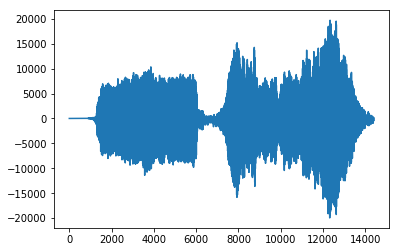

In [72]:
son = lect("/home/partage/I322/RAW/a.raw")
listTauxZCR = []
plot(range(0,len(son)), son)

for i in range(0, len(son) - 1000, 1000):
    listTauxZCR.append(zcrossing(son[i:i+1000]))
print(listTauxZCR)
print(sum(listTauxZCR))

(array([3., 3., 2., 0., 1., 1., 0., 1., 1., 2.]),
 array([13.9 , 16.24, 18.58, 20.92, 23.26, 25.6 , 27.94, 30.28, 32.62,
        34.96, 37.3 ]),
 <a list of 10 Patch objects>)

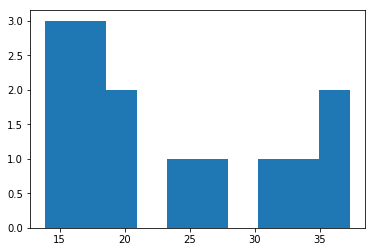

In [73]:
hist(listTauxZCR)

In [74]:
moy = mean(listTauxZCR)
ectype = std(listTauxZCR)
print(moy)
print(ectype)

23.178571428571427
8.290198909506554


In [75]:
def gaussienne(x, moy, ectype):
    return (1/(ectype*sqrt(2*pi))*exp(-0.5*(x - moy)**2/(ectype**2)))
    

In [76]:
y = [gaussienne(x, moy, ectype) for x in range(0, 50)]
    

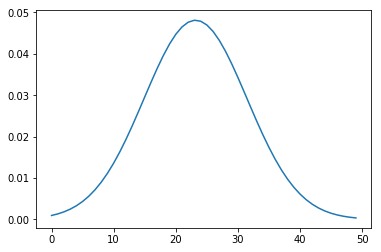

In [78]:
plot(y)

In [93]:
def apprentissage():
    """Calcule les moyennes et ecarts type de tous les fichiers
    fournis"""
    dicoAlphabet = {}
    for i in range(0, 10):
        son = lect("/home/partage/I322/RAW/"+str(i)+".raw")
        listTauxZCR = []
        for z in range(0, len(son) - 1000, 1000):
            listTauxZCR.append(zcrossing(son[z:z+1000]))
        dicoAlphabet[str(i)] = (mean(listTauxZCR), std(listTauxZCR))
    for i in "abcdefghijklmnopqrstuvwxyz":
        son = lect("/home/partage/I322/RAW/"+i+".raw")
        listTauxZCR = []
        for z in range(0, len(son) - 1000, 1000):
            listTauxZCR.append(zcrossing(son[z:z+1000]))
        dicoAlphabet[i] = (mean(listTauxZCR), std(listTauxZCR))
    return dicoAlphabet


In [92]:
print(apprentissage())

{'0': (16.133333333333336, 2.924418270737313), '1': (5.75, 2.2358816307368925), '2': (8.9, 7.031121295118345), '3': (16.21666666666667, 6.461789397854299), '4': (20.516666666666666, 6.4610155720461036), '5': (13.4, 8.236504112789602), '6': (18.785714285714285, 5.991047743193547), '7': (15.628571428571428, 1.9218401046276206), '8': (17.757142857142856, 7.373283266120256), '9': (15.085714285714287, 1.6207833832780383), 'a': (23.178571428571427, 8.290198909506554), 'b': (23.071428571428573, 8.381393386665536), 'c': (6.207142857142856, 5.14552014387471), 'd': (16.55, 2.75), 'e': (14.2, 2.499999999999999), 'f': (26.300000000000004, 6.000000000000002), 'g': (25.85, 1.7500000000000018), 'h': (10.8, 2.1000000000000005), 'i': (22.6, 0.40000000000000036), 'j': (25.833333333333332, 5.48047037721723), 'k': (25.133333333333336, 1.2657891697365027), 'l': (26.900000000000002, 1.5769168230019819), 'm': (22.3, 4.825626038833374), 'n': (17.866666666666667, 2.876726534718857), 'o': (11.800000000000002, 6